In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_nopass = pd.concat([pd.read_csv("results/out_nopass/faults_memory.csv"),
                       ])

df_eddi_cfcss = pd.concat([pd.read_csv("results/out_eddi_cfcss/faults_memory.csv"),
                           ]+
                           [pd.read_csv("results/out_eddi_cfcss/faults_memory_new.csv"),
                           ])

df_eddi_rasm_inter = pd.concat([pd.read_csv("results/out_eddi_rasm_inter/faults_memory.csv"),
                                ]+
                                [pd.read_csv("results/out_eddi_rasm_inter/faults_memory_new.csv"),
                                ])

df_eddi_rasm = pd.concat([pd.read_csv("results/out_eddi_rasm/faults_memory.csv"),
                          ]+
                          [pd.read_csv("results/out_eddi_rasm/faults_memory_new.csv"),
                          ])

df_fdsc_cfcss = pd.concat([pd.read_csv("results/out_fdsc_cfcss/faults_memory.csv"),
                           ]+
                           [pd.read_csv("results/out_fdsc_cfcss/faults_memory_new.csv"),
                           ])

df_fdsc_rasm_inter = pd.concat([pd.read_csv("results/out_fdsc_rasm_inter/faults_memory.csv"),
                                ]+
                                [pd.read_csv("results/out_fdsc_rasm_inter/faults_memory_new.csv"),
                                ])

df_fdsc_rasm = pd.concat([pd.read_csv("results/out_fdsc_rasm/faults_memory.csv"),
                          ]+
                          [pd.read_csv("results/out_fdsc_rasm/faults_memory_new.csv"),
                          ])

df_seddi_cfcss = pd.concat([pd.read_csv("results/out_seddi_cfcss/faults_memory.csv"),
                           ]+
                           [pd.read_csv("results/out_seddi_cfcss/faults_memory_new.csv"),
                           ])

df_seddi_rasm_inter = pd.concat([pd.read_csv("results/out_seddi_rasm_inter/faults_memory.csv"),
                                ]+
                                [pd.read_csv("results/out_seddi_rasm_inter/faults_memory_new.csv"),
                                ])

df_seddi_rasm = pd.concat([pd.read_csv("results/out_seddi_rasm/faults_memory.csv"),
                          ]+
                          [pd.read_csv("results/out_seddi_rasm/faults_memory_new.csv"),
                          ])


dataframes = {"eddi_cfcss": df_eddi_cfcss,
              "eddi_rasm": df_eddi_rasm,
              "eddi_rasm_inter": df_eddi_rasm_inter,
              "fdsc_cfcss": df_fdsc_cfcss,
              "fdsc_rasm": df_fdsc_rasm,
              "fdsc_rasm_inter": df_fdsc_rasm_inter,
              "seddi_cfcss": df_seddi_cfcss,
              "seddi_rasm": df_seddi_rasm,
              "seddi_rasm_inter": df_seddi_rasm_inter
              }

dataframes["nopass"] = df_nopass

In [3]:
df_new = pd.DataFrame()

for key in dataframes:
    df = dataframes[key]
    sz_tot = df.shape[0]
    df_errcodes = df.groupby('code')
    sz_df_errcodes = df_errcodes.size()
    df_new[key] = sz_df_errcodes

In [4]:
df_new.drop(0).sum()

eddi_cfcss          1296.0
eddi_rasm           1217.0
eddi_rasm_inter     1093.0
fdsc_cfcss          1296.0
fdsc_rasm           1214.0
fdsc_rasm_inter     1064.0
seddi_cfcss         1279.0
seddi_rasm          1174.0
seddi_rasm_inter    1108.0
nopass               466.0
dtype: float64

In [5]:
df_new.transpose()[0]

eddi_cfcss          24104.0
eddi_rasm           23591.0
eddi_rasm_inter     19055.0
fdsc_cfcss          28133.0
fdsc_rasm           27978.0
fdsc_rasm_inter     22454.0
seddi_cfcss         25604.0
seddi_rasm          23992.0
seddi_rasm_inter    19319.0
nopass              19534.0
Name: 0, dtype: float64

In [6]:
df_new.drop(0).transpose()

code,-3,-2,-1,1,2
eddi_cfcss,150.0,3.0,337.0,678.0,128.0
eddi_rasm,137.0,4.0,343.0,655.0,78.0
eddi_rasm_inter,112.0,1.0,363.0,525.0,92.0
fdsc_cfcss,201.0,11.0,485.0,463.0,136.0
fdsc_rasm,192.0,17.0,470.0,457.0,78.0
fdsc_rasm_inter,145.0,7.0,451.0,357.0,104.0
seddi_cfcss,165.0,6.0,383.0,598.0,127.0
seddi_rasm,154.0,3.0,353.0,576.0,88.0
seddi_rasm_inter,124.0,2.0,389.0,495.0,98.0
nopass,194.0,13.0,259.0,NaN,NaN


In [7]:
df_perc = (df_new.drop(0) / df_new.drop(0).sum() * 100).transpose()
df_perc

code,-3,-2,-1,1,2
eddi_cfcss,11.574074,0.231481,26.003086,52.314815,9.876543
eddi_rasm,11.257190,0.328677,28.184059,53.820871,6.409203
eddi_rasm_inter,10.247027,0.091491,33.211345,48.032937,8.417200
fdsc_cfcss,15.509259,0.848765,37.422840,35.725309,10.493827
fdsc_rasm,15.815486,1.400329,38.714992,37.644152,6.425041
fdsc_rasm_inter,13.627820,0.657895,42.387218,33.552632,9.774436
seddi_cfcss,12.900704,0.469116,29.945270,46.755278,9.929633
seddi_rasm,13.117547,0.255537,30.068143,49.063032,7.495741
seddi_rasm_inter,11.191336,0.180505,35.108303,44.675090,8.844765
nopass,41.630901,2.789700,55.579399,NaN,NaN


In [8]:
print("Percentage of faults detected by the SIHFT mechanism, considering only effective SEUs.")
df_new.drop([0, -1, -2, -3]).sum() / df_new.drop(0).sum() * 100

Percentage of faults detected by the SIHFT mechanism, considering only effective SEUs.


eddi_cfcss          62.191358
eddi_rasm           60.230074
eddi_rasm_inter     56.450137
fdsc_cfcss          46.219136
fdsc_rasm           44.069193
fdsc_rasm_inter     43.327068
seddi_cfcss         56.684910
seddi_rasm          56.558773
seddi_rasm_inter    53.519856
nopass               0.000000
dtype: float64

In [9]:
print("Percentage of faults detected by the SIHFT+Watchdog mechanism, considering only effective SEUs.")
df_new.drop([0, -1, -2]).sum() / df_new.drop(0).sum() * 100

Percentage of faults detected by the SIHFT+Watchdog mechanism, considering only effective SEUs.


eddi_cfcss          73.765432
eddi_rasm           71.487264
eddi_rasm_inter     66.697164
fdsc_cfcss          61.728395
fdsc_rasm           59.884679
fdsc_rasm_inter     56.954887
seddi_cfcss         69.585614
seddi_rasm          69.676320
seddi_rasm_inter    64.711191
nopass              41.630901
dtype: float64

In [10]:
df_new.sum()

eddi_cfcss          25400.0
eddi_rasm           24808.0
eddi_rasm_inter     20148.0
fdsc_cfcss          29429.0
fdsc_rasm           29192.0
fdsc_rasm_inter     23518.0
seddi_cfcss         26883.0
seddi_rasm          25166.0
seddi_rasm_inter    20427.0
nopass              20000.0
dtype: float64

# Plotting the data

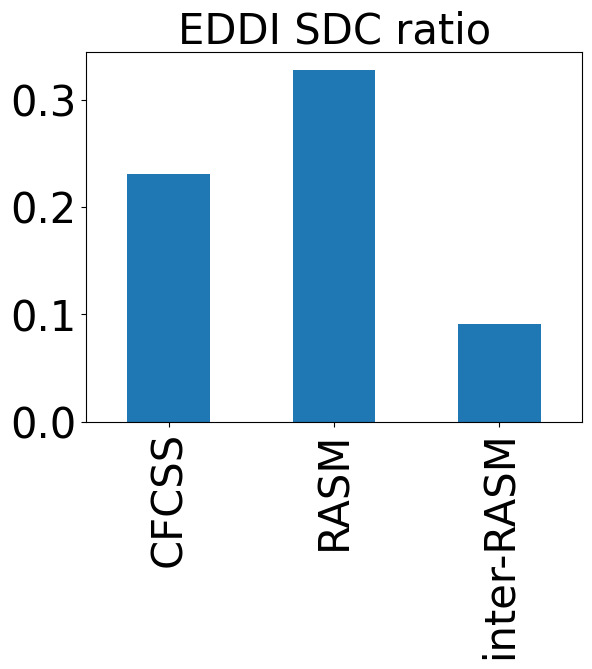

In [11]:
ax = df_perc.drop(['fdsc_cfcss', 'fdsc_rasm', 'fdsc_rasm_inter',
              'seddi_cfcss', 'seddi_rasm', 'seddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("EDDI SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/mem_eddi_sdc.svg",bbox_inches = 'tight')

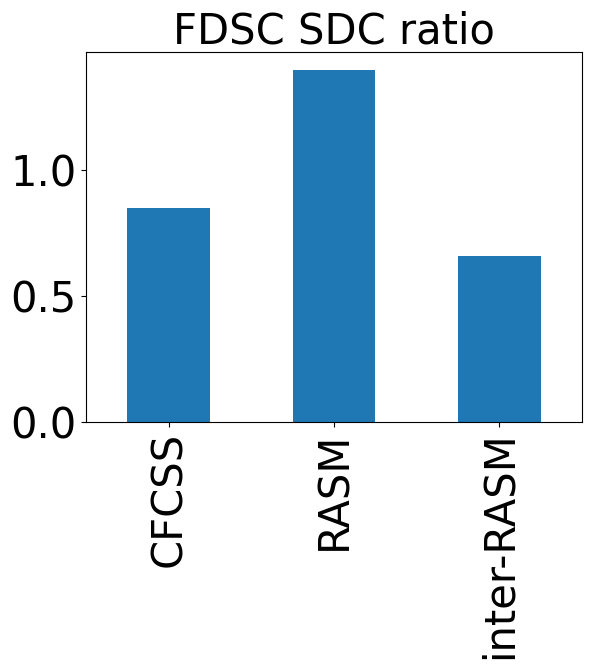

In [12]:
ax = df_perc.drop(['eddi_cfcss', 'eddi_rasm', 'eddi_rasm_inter',
              'seddi_cfcss', 'seddi_rasm', 'seddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("FDSC SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/mem_fdsc_sdc.svg",bbox_inches = 'tight')

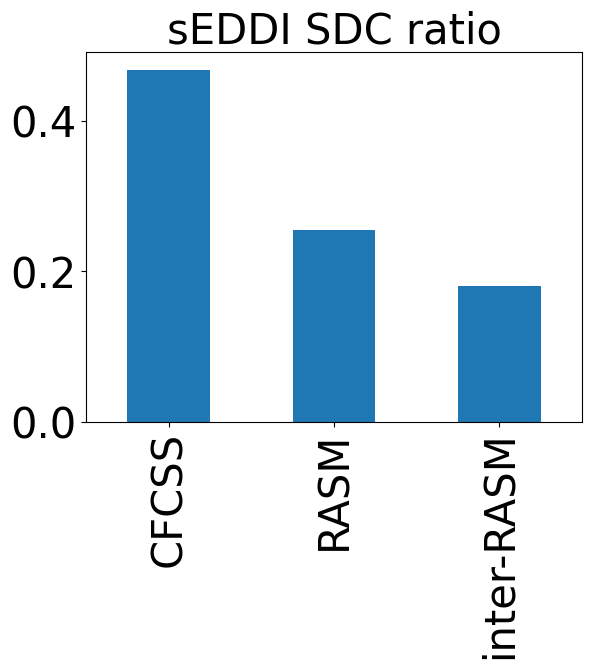

In [13]:
ax = df_perc.drop(['fdsc_cfcss', 'fdsc_rasm', 'fdsc_rasm_inter',
              'eddi_cfcss', 'eddi_rasm', 'eddi_rasm_inter', 'nopass']).plot(y=[-2], kind="bar")
ax.set_title("sEDDI SDC ratio", fontdict={'fontsize': 30})
ax.tick_params(axis='both', which='major', labelsize=30)
ax.get_legend().remove()
labels = ['CFCSS', 'RASM', 'inter-RASM']
ax.set_xticklabels(labels)
plt.savefig("figures/mem_seddi_sdc.svg",bbox_inches = 'tight')